In [32]:
from misc import *
from tqdm import tqdm
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [12]:
periods = 40
ppp = 500

means, covs, signals, mis = load_data(get_def_path()+"{}periods/{}ppp/".format(periods,ppp))
A, dt,C,D = mis
coeffs = [C,D,dt]
cov_in = covs[0]

tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]

In [14]:
from RNN_models import *

rmod = GRNNmodel(coeffs = [C.astype(np.float32),D.astype(np.float32),dt, 10], traj_details=[periods, ppp, 0, get_def_path()], cov_in=tf.convert_to_tensor(cov_in.astype(np.float32)), stateful=False, max_update=100)
rmod.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01))

rmod.recurrent_layer(tfsignals[:,:3,:], initial_state=rmod.initial_state)
rmod.trainable_variables[0].assign(tf.convert_to_tensor(np.array([[2*np.pi]]).astype(np.float32)))

<tf.Variable 'UnreadVariable' shape=(1, 1) dtype=float32, numpy=array([[6.2831855]], dtype=float32)>

In [28]:
def loss_landscape(length_series):
    parameters = np.arange(0,4*np.pi,np.pi)
    l={}
    for th in tqdm(parameters):
        rmod.trainable_variables[0].assign(tf.convert_to_tensor(np.array([[th]]).astype(np.float32)))
        dy = tfsignals[:,:length_series,:]
        tr = rmod(dy)
        diff = (tr - dy)[0]
        l[th] = np.sum(tf.einsum('bj,bj->b',diff,diff))/2
    loss_values = np.array(list(l.values()))/(dt*length_series)
    return loss_values

In [30]:
landscape = {}
for ind,lt in enumerate(np.logspace(2, np.log10(len(means)), 4)):
    landscape[ind] = loss_landscape(int(lt))

100%|██████████| 4/4 [10:00<00:00, 150.16s/it]


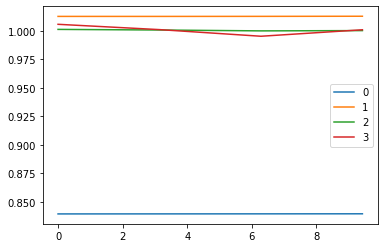

In [38]:
for k,v in landscape.items():
    plt.plot(parameters,v, label=k)
plt.legend()

In [40]:
np.logspace(2, np.log10(len(means)), 4)

array([1.00000000e+02, 1.00000333e+03, 1.00000667e+04, 1.00001000e+05])

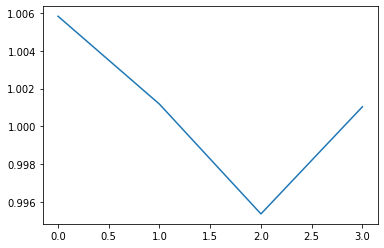

In [42]:
plt.plot(landscape[3])

In [43]:
vv = loss_landscape(len(means))

100%|██████████| 4/4 [09:49<00:00, 147.49s/it]


Check another region (like previous)